# Clustering - Unsupervised Learning

### - KMeans

### - Hierarchical - Agglomerative 

# Importing necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [8]:
import warnings
warnings.filterwarnings("ignore")

# Reading the Data

In [18]:
data = pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Understanding the Data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


# Dropping insignificant columns

In [19]:
data = data.drop(columns = ['Id'])

# Checking Outliers

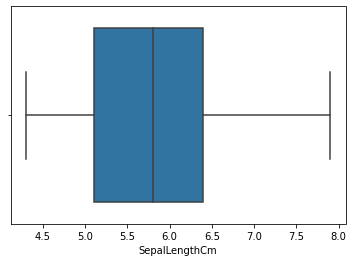

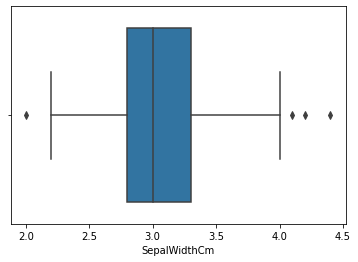

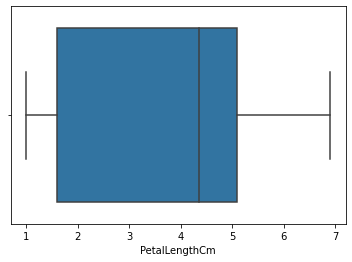

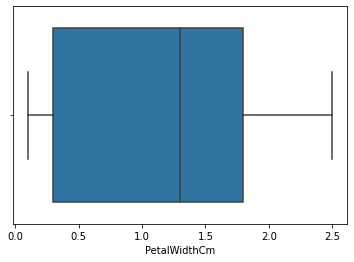

In [9]:
for i in data.columns:
    if i in data.select_dtypes(include=np.number):
        sb.boxplot(data[i])
        plt.show()

# Checking Distribution

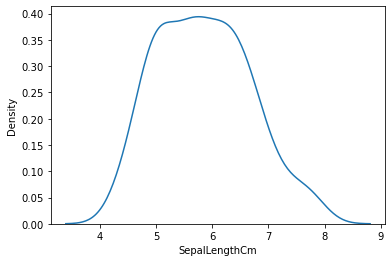

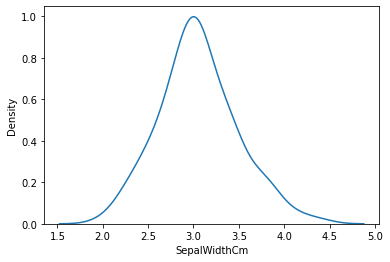

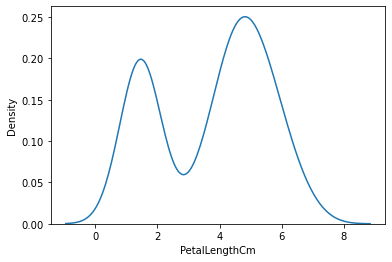

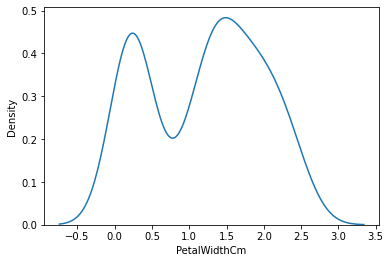

In [10]:
for i in data.columns:
    if i in data.select_dtypes(include=np.number):
        sb.kdeplot(data[i])
        plt.show()

# Checking different distribution

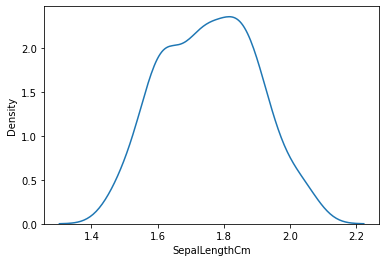

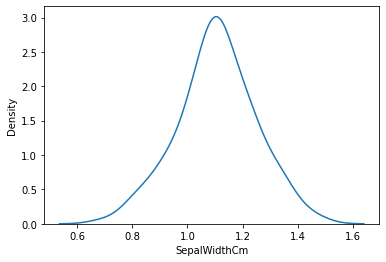

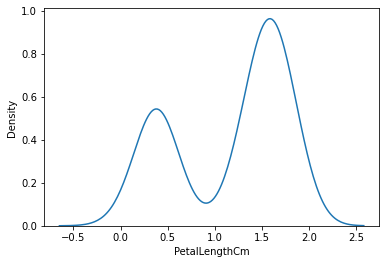

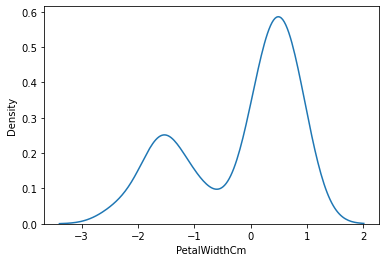

In [15]:
for i in data.columns:
    if i in data.select_dtypes(include=np.number):
        sb.kdeplot(np.log(data[i]))
        plt.show()

# Checking class balance

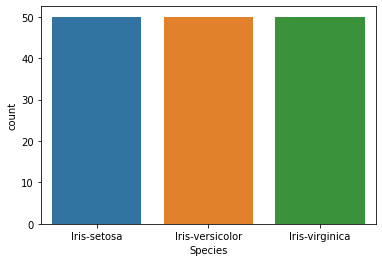

In [12]:
for i in data.columns:
    if i in data.select_dtypes(exclude=np.number):
        sb.countplot(data[i])
        plt.show()

# dropping of the Target column

In [20]:
data_new = data.drop(columns = ['Species'])

In [22]:
data_new.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# KMeans

In [23]:
from sklearn.cluster import KMeans

In [24]:
wcss = []

for i in range(1,11):
    kmeans_model = KMeans(n_clusters= i, random_state= 10)
    kmeans_model.fit(data_new)
    wcss.append(kmeans_model.inertia_)

# Elbow plot

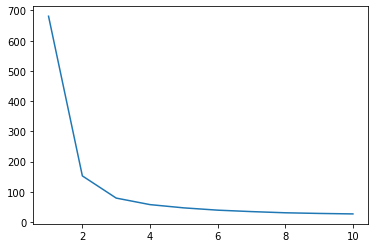

In [25]:
plt.plot(range(1,11), wcss)
plt.show()

In [26]:
from sklearn.metrics import silhouette_score

In [27]:
from yellowbrick.cluster import SilhouetteVisualizer

for cluster  2 silhouette score is  0.6808136202936816


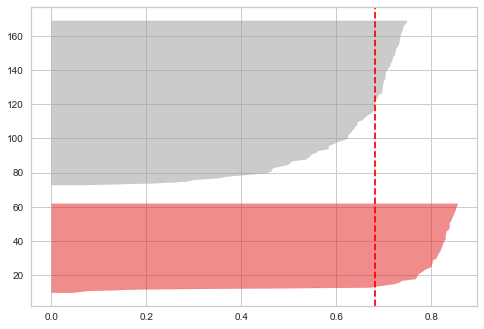

for cluster  3 silhouette score is  0.5525919445499757


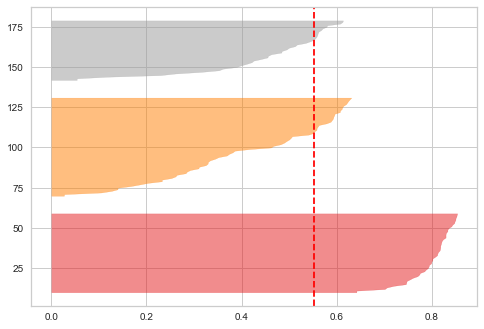

for cluster  4 silhouette score is  0.4978256901095472


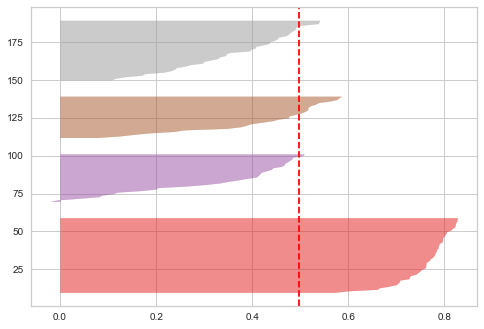

for cluster  5 silhouette score is  0.4885175508886279


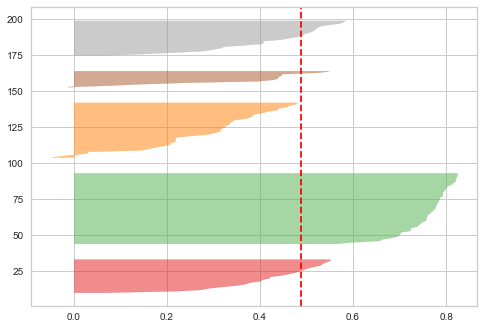

for cluster  6 silhouette score is  0.37121805054590085


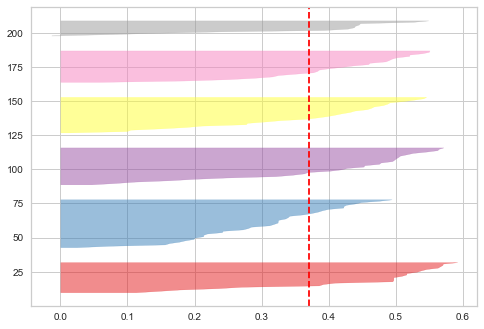

for cluster  7 silhouette score is  0.3600597997328459


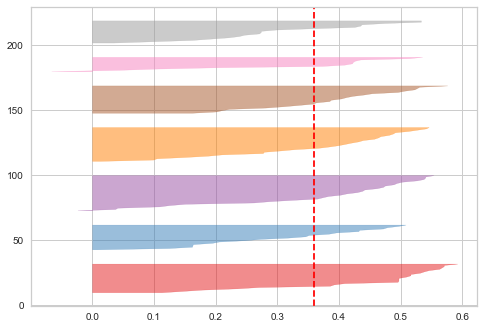

for cluster  8 silhouette score is  0.3603749708042153


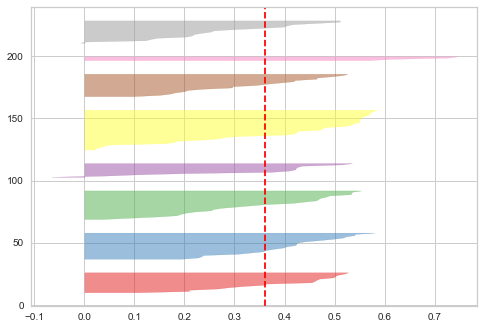

for cluster  9 silhouette score is  0.3139310239112048


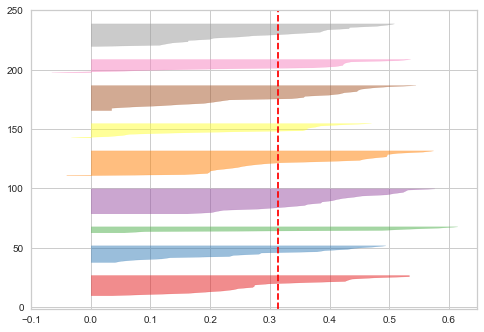

for cluster  10 silhouette score is  0.3080145835492473


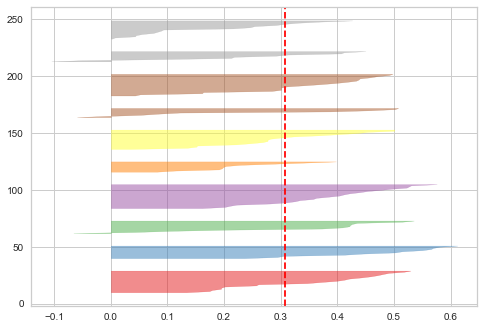

In [34]:
for i in range(2,11):
    kmeans_sil = KMeans(n_clusters=i, random_state=10)
    kmeans_sil.fit(data_new)
    sil_score = silhouette_score(data_new, kmeans_sil.labels_)
    print('for cluster ', i, 'silhouette score is ', sil_score)
    
    visualizer = SilhouetteVisualizer(kmeans_sil)
    visualizer.fit(data_new)
    plt.show()

# KMeans Model

In [35]:
model = KMeans(n_clusters= 3, random_state= 10)
model.fit(data_new)
set(model.labels_)

{0, 1, 2}

In [36]:
data_new['Labels'] = model.labels_

In [37]:
data_new.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


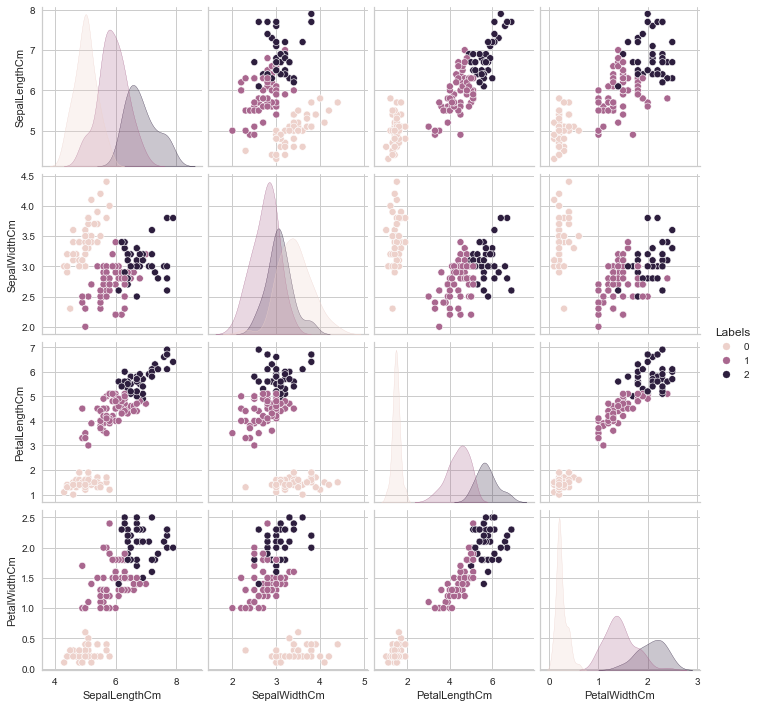

In [42]:
sb.pairplot(data = data_new, hue= 'Labels')
plt.show()

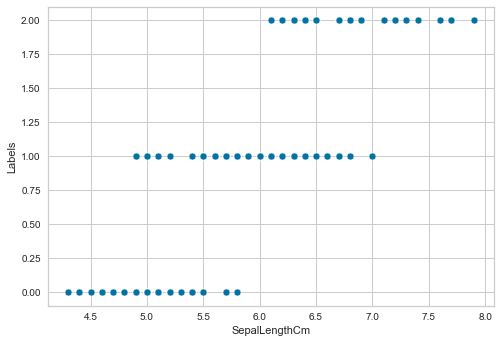

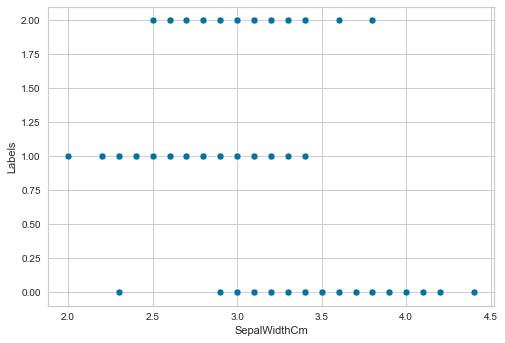

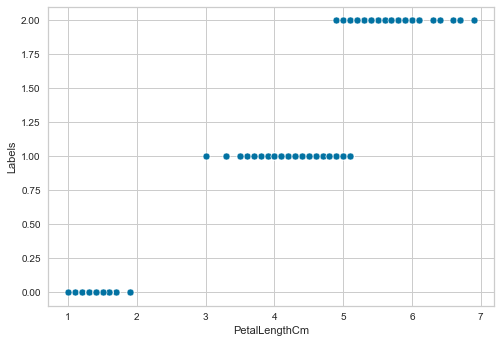

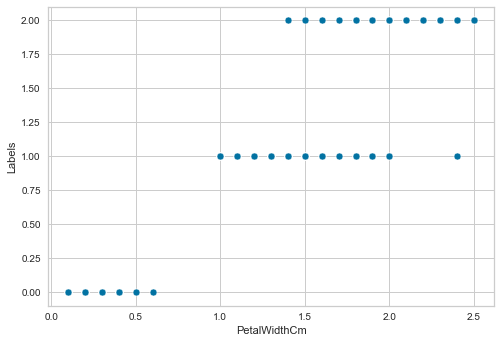

In [43]:
for i in data_new.drop(columns = 'Labels'):
    sb.scatterplot(data_new[i], data_new['Labels'])
    plt.show()

# Agglomerative

In [44]:
from sklearn.cluster import AgglomerativeClustering

In [45]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cophenet

In [50]:
from scipy.spatial.distance import pdist

score -  0.8795916817874395


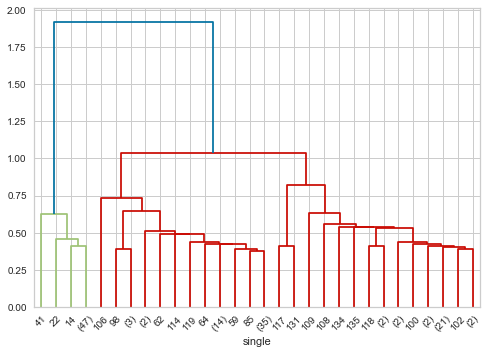

score -  0.8654179069780664


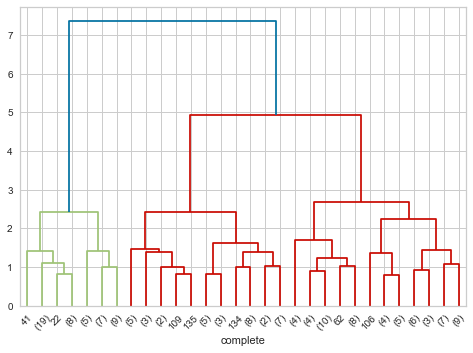

score -  0.8823020514788633


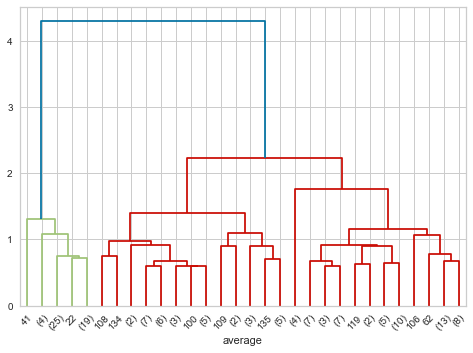

score -  0.8820785652392668


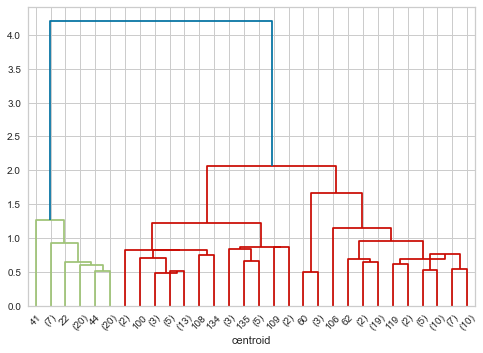

score -  0.8784224850949766


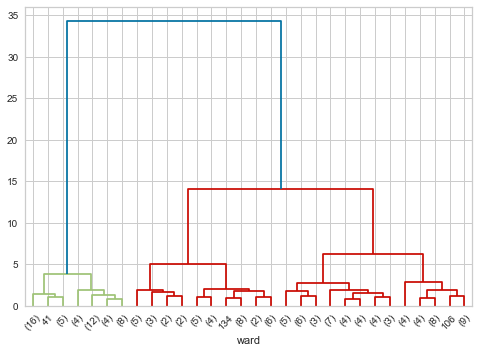

In [51]:
methods = ['single', 'complete', 'average', 'centroid', 'ward']

for i in methods:
    z = linkage(data_new , method= i)
    c , copf_dist = cophenet(z, pdist(data_new))
    print('score - ',c)
    dendrogram(z, truncate_mode='lastp', p=30)
    plt.xlabel(i)
    plt.show()

In [ ]:
for i in range(2,11):
    agg_sil = AgglomerativeClustering()
    kmeans_sil.fit(data_new)
    sil_score = silhouette_score(data_new, kmeans_sil.labels_)
    print('for cluster ', i, 'silhouette score is ', sil_score)
    
    visualizer = SilhouetteVisualizer(kmeans_sil)
    visualizer.fit(data_new)
    plt.show()

In [64]:
sil_n_k = []

for i in range(2,11):
    agg = AgglomerativeClustering(n_clusters=i, linkage='ward')
    agg.fit(data_new)
    
    sil_score = silhouette_score(data_new, agg.labels_)
    sil_n_k.append(sil_score)
    print('for cluster ', i, 'silhouette score is ', sil_score)

for cluster  2 silhouette score is  0.6835074914689716
for cluster  3 silhouette score is  0.6126634972047179
for cluster  4 silhouette score is  0.5318571516634117
for cluster  5 silhouette score is  0.5283028392638297
for cluster  6 silhouette score is  0.4017467289174298
for cluster  7 silhouette score is  0.38852014649556565
for cluster  8 silhouette score is  0.3638540325237407
for cluster  9 silhouette score is  0.3180447264476487
for cluster  10 silhouette score is  0.3055227605171988


In [66]:
data_new_agg = data.drop(columns = ['Species'])

In [67]:
data_new_agg.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [68]:
model = AgglomerativeClustering(n_clusters= 3)
model.fit(data_new_agg)
set(model.labels_)

{0, 1, 2}

In [69]:
data_new_agg['Labels'] = model.labels_

In [70]:
data_new_agg.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Labels
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


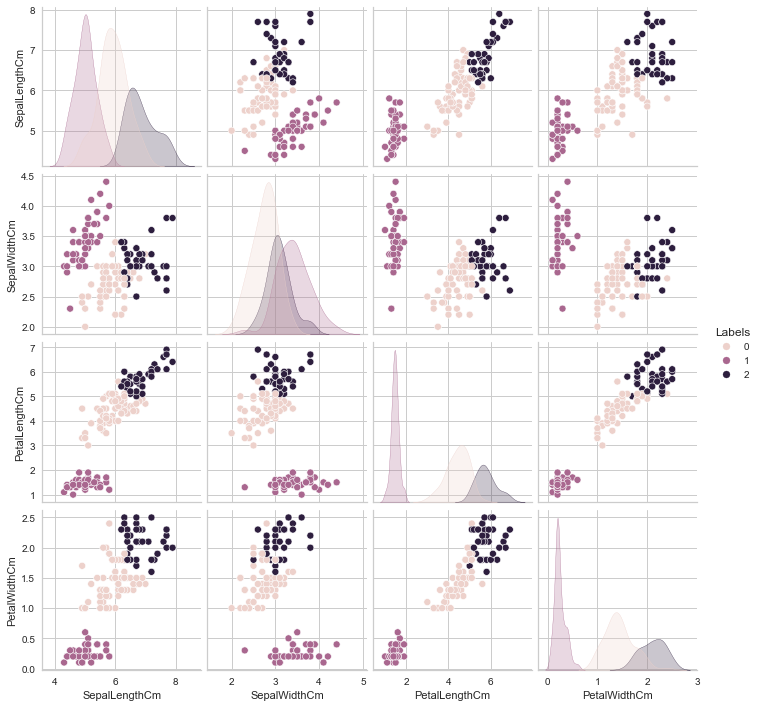

In [71]:
sb.pairplot(data = data_new_agg, hue= 'Labels')
plt.show()

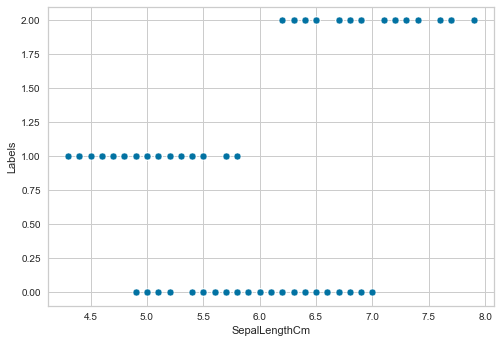

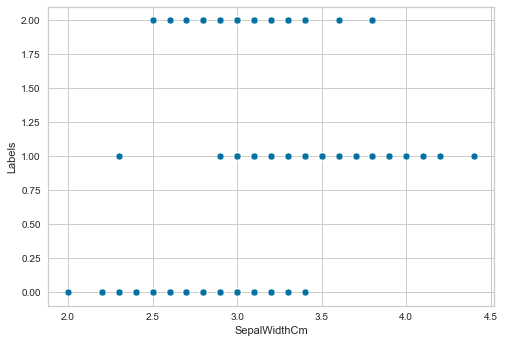

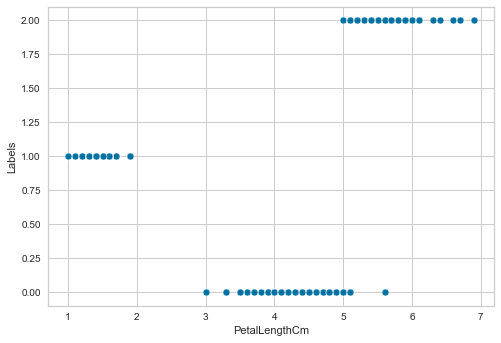

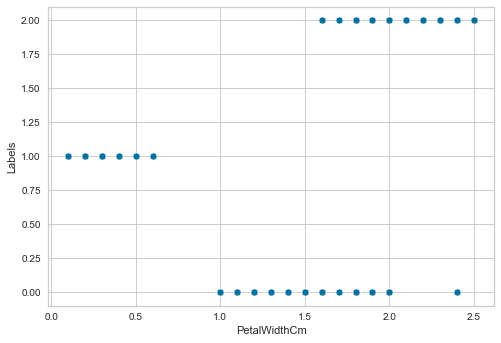

In [72]:
for i in data_new_agg.drop(columns = 'Labels'):
    sb.scatterplot(data_new_agg[i], data_new_agg['Labels'])
    plt.show()